## Model Training


### 1.1 Import Data and Required Packages

#### Importing pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame


In [3]:
df = pd.read_csv('data/stud.csv')

#### Top 5 Records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Assigning Attributes to X & Y


In [5]:
X = df.drop(columns=['reading score'], axis = 1)

In [6]:
y = df['reading score']

In [7]:
#Creating Column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude="object").columns
categ_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
onehot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
     ("OneHotEncoder",onehot_transformer,categ_features),
     ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

##### Train, Test, Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Evaluation Function to give all metrics after model Training

In [15]:
def evaluate_model(true,predicted):
    mean_abs_er = mean_absolute_error(true, predicted)
    mean_sqr_er = mean_squared_error(true, predicted)
    root_mse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mean_abs_er, root_mse, r2_square


In [19]:
models = {

"Linear Regression": LinearRegression(),
"Lasso": Lasso(),
"Ridge": Ridge(),
"K_Neighbors_Regressor" : KNeighborsRegressor(),
"Decision Tree": DecisionTreeRegressor(),
"Random Forest Regressor": RandomForestRegressor(),
"XGB_Regressor" : XGBRegressor(),
"CatBoost_Regressor" : CatBoostRegressor(),
"AdaBoost_Regressor" : AdaBoostRegressor()

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*34)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.8776
- Mean Absolute Error: 3.1291
- R2 Score: 0.9280
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3062
- Mean Absolute Error: 3.4875
- R2 Score: 0.9181


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.2215
- Mean Absolute Error: 3.4220
- R2 Score: 0.9147
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.6350
- Mean Absolute Error: 3.6941
- R2 Score: 0.9051


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.8720
- Mean Absolute Error: 3.1221
- R2 Score: 0.9282
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3028
- Mean Absolute Error: 3.4861
- R2 Score: 0.9182


K_Neighbors_Regressor
Model performance for Training set
- Root Mean Squared Error: 4.8030
- Mean Absolute Error: 3.7443
- R2 Score: 0.8896
-----------------------

### Results

In [24]:
pd.DataFrame(list(zip(model_list,r2_list)), columns = ['Model Name', 'R2 Score']).sort_values(by=["R2 Score"],ascending = False)

,Model Name,R2 Score
2,Ridge,0.918184
0,Linear Regression,0.918053
5,Random Forest Regressor,0.911392
7,CatBoost_Regressor,0.907223
1,Lasso,0.905059
8,AdaBoost_Regressor,0.900413
6,XGB_Regressor,0.899641
3,K_Neighbors_Regressor,0.836181
4,Decision Tree,0.816934


### Linear Regression

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 91.81


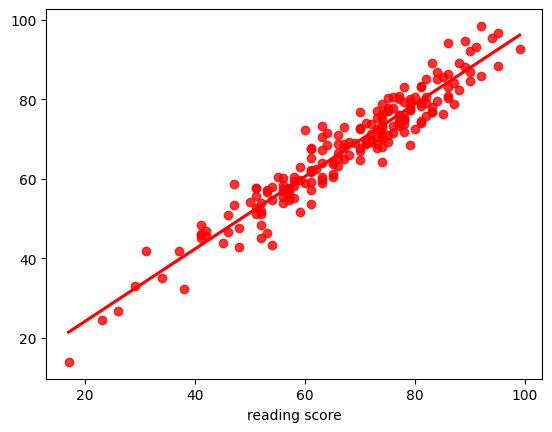

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');